*La base des TPs pour le cours "Classification des données" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, auteur Yury Kashnitsky)*



# <center> TP 3 : Les methodes de classification sur les données réelles

Dans ce TP, il vous faudra construire des arbres de décision, KNN, SVM et  Forêts aléatoires classificateurs pour l'identification des maladies du cœur.

**Votre travail consiste à écrire du code et effectuer des calculs dans les cellules ci-dessous.**

Tout d'abord, nous allons initialiser l'environnement, importons tout les bibliothèques nécessaires

In [ ]:
### You code here ###

## 1. SVM method pour la classification : données synthétiques

**Ex.1,2,3**: Séparez en deux classes les données {X, y} en entraînant des [SVM classificateur via sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) avec trois kernels: linéaire, polynôme et gaussien. Visualisez la limite de séparation résultante et les vecteurs du support pour chaque classificateur.

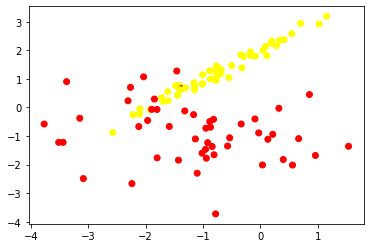

In [ ]:
from sklearn.datasets import make_classification
random_state = 4

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

In [ ]:
### You code here ###

**Ex.4,5,6**: Affichez les matrices de confusion [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), calculez les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score); et visualisez [les courbes du ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pour chaque classificateur. Comparez les résultats.

In [ ]:
### You code here ###

## 2. Arbres de décision, Forêts aléatoires, KNN and SVM methodes pour prédire les maladies cardiaques

Dans cette partie on va appliquer les méthodes de classification étudiées sur les données explorées dans le TP 1.

### Problème

Prédire la présence ou l'absence de maladie cardiovasculaire (MCV) en utilisant les résultats de l'examen du patient.

### Description des données

Il existe 3 types de caractéristiques d'entrée:

- *Objectives*: informations factuelles;
- *Examinées*: résultats d'un examen médical;
- *Subjectives*: informations données par le patient.

La description des données en anglais :

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du dataset ont été collectées au moment de l'examen médical.

In [ ]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"
df = pd.read_csv(url, sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Ex.7**: Créez un nouveau DataFrame `data` depuis `df` avec les caractéristiques transformées :
- crée "age in years" en divisant l'âge par 365,25 et en prenant le seuil ([x] est le plus grand entier inférieur ou égal à $x$)
- créer 3 caractéristiques binaires basées sur `cholesterol`.
- créer 3 caractéristiques binaires basées sur `gluc`.

Caractéristiques binaires égales à 1, 2 ou 3. Cette méthode est appelée codage factice ou codage à chaud -One Hot Encoding- (OHE). Il est plus pratique d'utiliser [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). Il n’est pas nécessaire d’utiliser les caractéristiques originales `cholestérol` et` gluc` après l’encodage.

In [ ]:
data = ...

### You code here ###

data.drop(['id','age','cardio'],axis=1,inplace=True)
data.head()

**Ex. 8** : Divisez les données en parties d'entraînement et de validation dans la proportion de 7/3 en utilisant [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) avec` random_state = 17`.

In [ ]:
y_labels = df['cardio']

# You code here

# X_train, X_valid, y_train, y_valid = ...

**Ex. 9** : Entraînez un arbre de décision ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) sur le jeu de données `(X _train, y_ train)` avec **max_depth égale à 3** et `random _state = 17`. Tracez cet arbre avec `sklearn.tree.export_graphviz` et Graphviz (code est ci-dessous).

In [ ]:
#!pip install pydotplus, Pillow

import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)


#tree_graph_to_png(..., png_file_to_save='decision_tree1.png')
#Image("/content/decision_tree1.png")

In [ ]:
# You code here

**Ex. 10** : Quelles sont les 3 caractéristiques utilisées pour effectuer des prédictions dans l'arbre de décision créé?


In [ ]:
# You code here

**Ex. 11** : Faites des prédictions pour les données de validation `(X_valid, y_valid)` avec l'arbre de décision formé. Calculez les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

In [ ]:
# You code here

**Ex. 12 (Bonus)** : Définissez la profondeur (depth) de l’arbre à l’aide de la validation croisée sur le jeu de données `(X _train, y_ train)` afin d’améliorer la qualité du modèle. Utilisez [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) avec 5 folds. Fixez `random_state = 17` et changez` max_depth` de 2 à 10.

In [ ]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV # You code here

**Ex. 13 (Bonus)** : Tracez le graphique pour montrer comment la précision moyenne change par rapport à la valeur `max_depth` lors de la validation croisée.

In [ ]:
# You code here

**Ex. 14 (Bonus)** : Affichez la meilleure valeur de `max_depth` où la valeur moyenne de la métrique de qualité de validation croisée atteint son maximum. Calculez également les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) sur les données de validation; et comparez les résultats avec les résultats obtenus dans l'**Ex.11**.

In [ ]:
# You code here

Consultez le tableau SCORE pour évaluer le risque de maladie cardiovasculaire mortelle sur dix ans en Europe. [source](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=70%>

**Ex. 15** : Créez de nouvelles caractéristiques en fonction de cette image:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 caractéristiques)
- systolic blood pressure (tension artérielle systolique) : $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 caractéristiques)

Si les valeurs d'âge ou de pression artérielle ne tombent dans aucun des intervalles, toutes les caractéristiques binaires seront égales à zéro.




In [ ]:
# You code here

**Ex. 16** : Modifiez les caractéristiques `cholesterol` et `gender`. Transformez le `cholestérol` en 3 caractéristiques binaires en fonction de ses 3 valeurs uniques (`cholestérol` = 1, `cholestérol` = 2 et `cholestérol` = 3). Transformez le `sexe` de 1 et 2 en 0 et 1. Il vaut mieux le renommer en `male` (0 - woman, 1 - man). En général, cela se fait généralement avec [`sklearn.preprocessing.LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) mais ici, dans le cas de 2 valeurs uniques, ce n'est pas nécessaire.




In [ ]:
# You code here

**Ex. 17** : Enfin, créez un arbre de décision ([`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) à l'aide de ces 12 caractéristiques binaires : 4 de l'age, 3 de tension artérielle systolique, 1 `smoke`, 3 du cholesterol et 1 `male` (à l'exclusion de toutes les caractéristiques d'origine dont nous disposions avant cette partie ingénierie des caractéristiques).

Créez votre arbre de décision avec la limitation `max_depth = 3` and `random_state = 17` (tous les autres arguments doivent être conservés avec leurs valeurs par défaut), entraînez-le sur l'ensemble des données d'entraînement.


In [ ]:
# You code here

**Ex. 18** : Quelle caractéristique binaire est la plus importante pour la détection des maladies cardiaques (c’est-à-dire celle est placée à la racine (root) de l’arbre)?

In [ ]:
# You code here

**Ex. 19 (Bonus)** : Appliquez les k-NN ([`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), Forêt aléatoire ([`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) et [`SVM`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) méthodes sur les données utilisées dans l'**Ex. 17** (celles avec 12 caractéristiques binaires). Utilisez la Validation Croisée pour avoir de meilleurs résultats.

**Ex. 20 (Bonus)** :  Calculez les métriques de qualité de classification : [`Accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`Precision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`Recall`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score), [`F1`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) pour chaque classificateur (DT, KNN, RF et SVM); et affichez les resultats sous forme de tableau.